In [3]:
import ee
ee.Authenticate()
ee.Initialize()
import geemap
geemap.ee_initialize()

In [4]:
#import libs
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#loads functions
def prepare_map(cords, train=False):
    """
    This function, generates base map
    """
    Map = geemap.Map(center=cords, zoom=14)
    Map.add_basemap("SATELLITE")
    if train:
        region = ee.Geometry.BBox(18.23, 52.663, 18.32, 52.709)
    else:
        region = ee.Geometry.BBox(cords[1]-0.05, cords[0]-0.03, cords[1]+0.05, cords[0]+0.03)
    fc = ee.FeatureCollection(region)
    style = {'color': 'ffff00ff', 'fillColor': '00000000'}
    Map.addLayer(fc.style(**style), {}, 'polygon')

    return Map

def generate_past_dates(start_date_str):
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")

    dates = []
    
    for _ in range(10):
        dates.append(start_date.strftime("%Y-%m-%d"))
        start_date -= timedelta(days=10)
    
    return dates

def select_classification_region_map(cords, train=False, sentinel_start='2024-06-30', sentinel_stop='2024-07-01', sar_start='2024-06-30', sar_stop='2024-07-01', optical=False, cloudy_pixel_precentage=100):
    if train:
        region = ee.Geometry.BBox(18.23, 52.663, 18.32, 52.709)
    else:
        region = ee.Geometry.BBox(cords[1]-0.05, cords[0]-0.03, cords[1]+0.05, cords[0]+0.03)
        #region = ee.Geometry.BBox(cords[1]-3, cords[0]-2, cords[1]+3, cords[0]+2)

    #loads data:
    if optical:
        collection = (
        ee.ImageCollection('COPERNICUS/S2_SR')
        .filterDate(sentinel_start, sentinel_stop)
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', cloudy_pixel_precentage))
        )
        try:
            size = collection.size().getInfo()
        except:
            raise ValueError("Image collection is empty")
        B1 = collection.select('B1')
        B2 = collection.select('B2')
        B3 = collection.select('B3')
        B4 = collection.select('B4')
        B5 = collection.select('B5')
        B6 = collection.select('B6')
        B7 = collection.select('B7')
        B8 = collection.select('B8')
        B9 = collection.select('B9')
        B8A = collection.select('B8A')
        B11 = collection.select('B11')
        B12 = collection.select('B12')

        B1 = ee.Image(B1.median())
        B2 = ee.Image(B2.median())
        B3 = ee.Image(B3.median())
        B4 = ee.Image(B4.median())
        B5 = ee.Image(B5.median())
        B6 = ee.Image(B6.median())
        B7 = ee.Image(B7.median())
        B8 = ee.Image(B8.median())
        B9 = ee.Image(B9.median())
        B8A = ee.Image(B8A.median())
        B11 = ee.Image(B11.median())
        B12 = ee.Image(B12.median())

    dates = generate_past_dates(sar_stop)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
        .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')) \
        .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')) \
        .filter(ee.Filter.eq('instrumentMode', 'IW')) \
        .filterBounds(region) \
        .filterDate(dates[9], dates[0])
    VH = collection.select('VH')
    VH9 = ee.Image(VH.filterDate(dates[9], dates[8]).median()).unitScale(-50, 1).multiply(3000)
    VH8 = ee.Image(VH.filterDate(dates[8], dates[7]).median()).unitScale(-50, 1).multiply(3000)
    VH7 = ee.Image(VH.filterDate(dates[7], dates[6]).median()).unitScale(-50, 1).multiply(3000)
    VH6 = ee.Image(VH.filterDate(dates[6], dates[5]).median()).unitScale(-50, 1).multiply(3000)
    VH5 = ee.Image(VH.filterDate(dates[5], dates[4]).median()).unitScale(-50, 1).multiply(3000)
    VH4 = ee.Image(VH.filterDate(dates[4], dates[3]).median()).unitScale(-50, 1).multiply(3000)
    VH3 = ee.Image(VH.filterDate(dates[3], dates[2]).median()).unitScale(-50, 1).multiply(3000)
    VH2 = ee.Image(VH.filterDate(dates[2], dates[1]).median()).unitScale(-50, 1).multiply(3000)
    VH1 = ee.Image(VH.filterDate(dates[1], dates[0]).median()).unitScale(-50, 1).multiply(3000)
    VV = collection.select('VV')
    VV9 = ee.Image(VV.filterDate(dates[9], dates[8]).median()).unitScale(-50, 1).multiply(3000)
    VV8 = ee.Image(VV.filterDate(dates[8], dates[7]).median()).unitScale(-50, 1).multiply(3000)
    VV7 = ee.Image(VV.filterDate(dates[7], dates[6]).median()).unitScale(-50, 1).multiply(3000)
    VV6 = ee.Image(VV.filterDate(dates[6], dates[5]).median()).unitScale(-50, 1).multiply(3000)
    VV5 = ee.Image(VV.filterDate(dates[5], dates[4]).median()).unitScale(-50, 1).multiply(3000)
    VV4 = ee.Image(VV.filterDate(dates[4], dates[3]).median()).unitScale(-50, 1).multiply(3000)
    VV3 = ee.Image(VV.filterDate(dates[3], dates[2]).median()).unitScale(-50, 1).multiply(3000)
    VV2 = ee.Image(VV.filterDate(dates[2], dates[1]).median()).unitScale(-50, 1).multiply(3000)
    VV1 = ee.Image(VV.filterDate(dates[1], dates[0]).median()).unitScale(-50, 1).multiply(3000)

    if optical:
        image = VV1.addBands([VV2, VV3, VV4, VV5, VV6, VV7, VV8, VV9, VH1, VH2, VH3, VH4, VH5, VH6, VH7, VH8, VH9, B1, B2, B3, B4, B5, B6, B7, B8, B9, B8A, B11, B12])
        image = image.rename(['VV1', 'VV2', 'VV3', 'VV4', 'VV5', 'VV6', 'VV7', 'VV8', 'VV9', 'VH1', 'VH2', 'VH3', 'VH4', 'VH5', 'VH6', 'VH7', 'VH8','VH9', 'B1' ,'B2' ,'B3' ,'B4' ,'B5' ,'B6' ,'B7' ,'B8' ,'B8A' ,'B9' ,'B11' ,'B12'])
    else:
        image = VV1.addBands([VV2, VV3, VV4, VV5, VV6, VV7, VV8, VV9, VH1, VH2, VH3, VH4, VH5, VH6, VH7, VH8, VH9])
        image = image.rename(['VV1', 'VV2', 'VV3', 'VV4', 'VV5', 'VV6', 'VV7', 'VV8', 'VV9', 'VH1', 'VH2', 'VH3', 'VH4', 'VH5', 'VH6', 'VH7', 'VH8','VH9'])
    image = image.clip(region)

    return image, region

def prepare_data_to_classification(image, region):
    landcover = ee.ImageCollection('ESA/WorldCover/v200')
    landcover_region_clipped = landcover.map(lambda image: image.clip(region))
    landcover_region_clipped = landcover_region_clipped.first()
    mask_cropland = landcover_region_clipped.select('Map').eq(40)
    fields = image.updateMask(mask_cropland)

    return fields, mask_cropland

def load_train_data():

    crops_shp = "crops.shp"
    crops = geemap.shp_to_ee(crops_shp)
    crops_raster = crops.reduceToImage(properties=['crop_id'], reducer=ee.Reducer.first())
    vis_params = {
        'min': 0,
        'max': 26,
        'palette': [
            'fc2a85ff', '445d07ff', 'f4a21fff', 'b3573bff', '260d22ff', 'b81448',
            'd17501ff', '4354ccff', '3f49dbff', 'f7d97bff', '3c2db7ff', '57f011ff',
            '#E9967A', '#228B22', '#FF8C00', '#8A2BE2', '#8B4513', '933b86ff',
            '7c3efeff', '3673ddff', '63e972ff', '29b7dcff', 'cd2d19ff', '#FFD700',
            'a211deff', '732876ff', '3a5c4dff'
        ]
    }

    return crops_raster, vis_params

def make_training_points(crops_raster, mask_cropland):

    points = crops_raster.sample(
    **{
        "region": mask_cropland.geometry(),
        "scale": 30,
        "numPixels": 10000,
        "seed": 0,
        "geometries": True,
    }
)
    return points

def prepare_classifier(fields, points, optical):
    if optical:
        bands = ['VV1', 'VV2', 'VV3', 'VV4', 'VV5', 'VV6', 'VV7', 'VV8', 'VV9', 'VH1', 'VH2', 'VH3', 'VH4', 'VH5', 'VH6', 'VH7', 'VH8','VH9', 'B1' ,'B2' ,'B3' ,'B4' ,'B5' ,'B6' ,'B7' ,'B8' ,'B8A' ,'B9' ,'B11' ,'B12']
    else:    
        bands = ['VV1', 'VV2', 'VV3', 'VV4', 'VV5', 'VV6', 'VV7', 'VV8', 'VV9', 'VH1', 'VH2', 'VH3', 'VH4', 'VH5', 'VH6', 'VH7', 'VH8','VH9']
    label = "first"
    training = fields.select(bands).sampleRegions(
        **{"collection": points, "properties": [label], "scale": 30}
    )
    trained = ee.Classifier.smileRandomForest(60).train(training, label, bands)

    return trained, bands

def display_classificated_map(Map, fields, bands, trained, vis_params, year='2024'):
    result = fields.select(bands).classify(trained)
    Map.addLayer(result, vis_params, f'crop {year}')

    return Map, result

def classify_crop_by_id(fields, bands, trained, crop_id):
    result = fields.select(bands).classify(trained)
    result=result.select('classification').eq(crop_id)

    return result

def classify_crops(fields, bands, trained):
    result = fields.select(bands).classify(trained)

    return result

def train(optical=False):
    Map = prepare_map([52.68, 18.28], train=True)
    image, region = select_classification_region_map([52.68, 18.28], train=True, optical=optical)
    fields, mask_cropland = prepare_data_to_classification(image, region)
    raster_upraw, vis_params = load_train_data()
    points = make_training_points(raster_upraw, mask_cropland)
    trained, bands = prepare_classifier(fields, points, optical=optical)

    return trained, bands, vis_params

def add_legend_to_map(Map):
    legend_dict = {
        'Rye': 'fc2a85', 
        'Rapeseed': '445d07',
        'Winter wheat': 'f4a21f',
        'Sugar beet': 'b3573b',
        'Corn': '260d22',
        'Spring barley': 'b81448',
        'Potatoes': 'd17501',
        'Spring onion': '4354cc',
        'Soil': '3f49db',
        'Broccoli': 'f7d97b', 
        'Oats': '3c2db7', 
        'Winter onion': '57f011', 
        'Garlic': 'E9967A',  
        'Trees': '228B22',  
        'Pumpkin': 'FF8C00',  
        'Phacelia': '8A2BE2',  
        'Beans': '8B4513', 
        'Peas': '933b86',  
        'Green peas': '7c3efe',  
        'Winter barley': '3673dd',  
        'Dill': '63e972',  
        'Alfalfa': '29b7dc', 
        'Parsley': 'cd2d19', 
        'Rye with barley': 'FFD700',  
        'Celery': 'a211de', 
        'Soy': '732876', 
        'Grass': '3a5c4d',  
    }
    Map.add_legend(title="Classified Crops:", legend_dict=legend_dict, position="bottomright")
    Map.addLayerControl()

    return Map

def generate_lighter_colors(hex_color, steps=10):
    """Generaes color list"""
    hex_color = hex_color.lstrip('#')
    if len(hex_color) == 3:
        hex_color = ''.join([c*2 for c in hex_color])
    
    rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    def lighten_color(rgb_color, percentage):
        return tuple(min(255, int(c + (255 - c) * percentage / 100)) for c in rgb_color)

    def rgb_to_hex(rgb_color):
        return '#' + ''.join(f'{int(c):02x}' for c in rgb_color)

    colors = [rgb_to_hex(rgb_color)]
    for i in range(1, steps + 1):
        lightened_rgb = lighten_color(rgb_color, i * 10)
        colors.insert(0, rgb_to_hex(lightened_rgb))

    return colors

def generate_legend(Map, colors, title = 'Crop occurrence:'):
    legend = {index: color for index, color in enumerate(colors)}
    Map.add_legend(title=title, legend_dict=legend, position="bottomright")
    Map.addLayerControl()
    
    return Map

def generate_index_legend(Map, colors, title = 'Crop occurrence:'):
    legend = {round((1-(index/10)), 2): color for index, color in enumerate(colors)}
    Map.add_legend(title=title, legend_dict=legend, position="bottomright")
    Map.addLayerControl()
    
    return Map

def generate_crop_histogram(result, region):
    legend_dict = {
        '1': 'Rapeseed',
        '2': 'Winter wheat',
        '3': 'Sugar beet',
        '4': 'Corn',
        '5': 'Spring barley',
        '6': 'Potatoes',
        '7': 'Spring onion',
        '8': 'Soil',
        '9': 'Broccoli', 
        '10': 'Oats', 
        '11': 'Winter onion', 
        '12': 'Garlic',  
        '13': 'Trees',  
        '14': 'Pumpkin',  
        '15': 'Phacelia',  
        '16': 'Beans', 
        '17': 'Peas',  
        '18': 'Green peas',  
        '19': 'Winter barley',  
        '20': 'Dill',  
        '21': 'Alfalfa', 
        '22': 'Parsley', 
        '23': 'Rye with barley',  
        '24': 'Celery', 
        '25': 'Soy', 
        '26': 'Grass',  
        '27': 'Rye',
    }
    unique_values = result.reduceRegion(
        reducer=ee.Reducer.frequencyHistogram(), 
        geometry=region, 
        scale=5
    ).getInfo()
    unique_values = unique_values['classification']
    unique_values = {key: value*0.0025 for key, value in unique_values.items()}
    value_to_crop = {int(k): legend_dict.get(k, f'Unknown ({k})') for k in unique_values.keys()}

    crop_value = dict()
    for key, crop in unique_values.items():
        crop_value[value_to_crop[int(key)]] = crop

    
    return crop_value

def generate_plot(plots):
    legend_dict = {
        'Rapeseed': '#445d07',
        'Winter wheat': '#f4a21f',
        'Sugar beet': '#b3573b',
        'Corn': '#260d22',
        'Spring barley': '#b81448',
        'Potatoes': '#d17501',
        'Spring onion': '#4354cc',
        'Soil': '#3f49db',
        'Broccoli': '#f7d97b', 
        'Oats': '#3c2db7', 
        'Winter onion': '#57f011', 
        'Garlic': '#E9967A',  
        'Pumpkin': '#FF8C00',  
        'Phacelia': '#8A2BE2',  
        'Beans': '#8B4513', 
        'Peas': '#933b86',  
        'Green peas': '#7c3efe',  
        'Winter barley': '#3673dd',  
        'Dill': '#63e972',  
        'Alfalfa': '#29b7dc', 
        'Parsley': '#cd2d19', 
        'Rye with barley': '#FFD700',  
        'Celery': '#a211de', 
        'Soy': '#732876', 
        'Grass': '#3a5c4d',  
        'Rye': '#fc2a85', 
    }
    df = pd.DataFrame(plots)
    df = df.fillna(0)
    df = df.T
    plt.figure(figsize=(14, 8))
    for crop in df.columns:
        color = legend_dict.get(crop, '#000000')
        plt.plot(df.index, df[crop], label=crop, color=color)
    plt.xlabel('Year')
    plt.ylabel('Value [ha]')
    plt.title('Crop Area Over Time (2015-2024)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt.show()

In [7]:
#loads classification functions
def classify(cords, generate_crop_plot = False, start_date='2024-06-30', stop_date='2024-07-01', cloudy_pixel_precentage=100):
    Map = prepare_map(cords)
    #lower layer sar
    trained, bands, vis_params = train()
    dates = [
        ['2015-07-01', '2015-07-05'],
        ['2016-06-25', '2016-06-30'],
        ['2017-06-20', '2017-06-25'],
        ['2018-06-20', '2018-06-25'], 
        ['2019-07-05', '2019-07-10'], 
        ['2020-07-01', '2020-07-05'],
        ['2021-07-15', '2021-07-20'],
        ['2022-07-01', '2022-07-05'], 
        ['2023-07-07', '2023-07-10']
    ]
    if generate_crop_plot:
        plots = dict()
    for date in dates:
        image, region = select_classification_region_map(cords, sar_start=date[0], sar_stop=date[1])
        fields, _ = prepare_data_to_classification(image, region)
        Map, result= display_classificated_map(Map, fields, bands, trained, vis_params, date[0][:4])
        if generate_crop_plot:
            plots[date[0][:4]]=(generate_crop_histogram(result, region))
    #upper layer, sar+optical
    trained, bands, vis_params = train(optical=True)
    image, region = select_classification_region_map(cords, sentinel_start=start_date, sentinel_stop=stop_date, optical=True, cloudy_pixel_precentage=cloudy_pixel_precentage)
    fields, _ = prepare_data_to_classification(image, region)
    Map, result = display_classificated_map(Map, fields, bands, trained, vis_params, '2024')
    if generate_crop_plot:
        plots['2024']=(generate_crop_histogram(result, region))
    Map = add_legend_to_map(Map)
    if generate_crop_plot:
        return Map, plots
    else:
        return Map

def classify_crop(cords, crop_key, color, start_date='2024-06-30', stop_date='2024-07-01', cloudy_pixel_precentage=100):
    crops = { 
        'Rapeseed': 1,
        'Winter wheat': 2,
        'Sugar beet': 3,
        'Corn': 4,
        'Spring barley': 5,
        'Potatoes': 6,
        'Spring onion': 7,
        'Soil': 8,
        'Broccoli': 9, 
        'Oats': 10, 
        'Winter onion': 11, 
        'Garlic': 12,  
        'Trees': 13,  
        'Pumpkin': 14,  
        'Phacelia': 15,  
        'Beans': 16, 
        'Peas': 17,  
        'Green peas': 18,  
        'Winter barley': 19,  
        'Dill': 20,  
        'Alfalfa': 21, 
        'Parsley': 22, 
        'Rye with barley': 23,  
        'Celery': 24, 
        'Soy': 25, 
        'Grass': 26,  
        'Rye': 27 
    }
    crop_id = crops.get(crop_key)
    Map = prepare_map(cords)
    #upper layer, sar+optical
    trained, bands, vis_params = train(optical=True)
    image, region = select_classification_region_map(cords, optical=True, sentinel_start=start_date, sentinel_stop=stop_date, cloudy_pixel_precentage=cloudy_pixel_precentage)
    fields, _ = prepare_data_to_classification(image, region)
    result = classify_crop_by_id(fields, bands, trained, crop_id)
    #lower layer sar
    trained, bands, vis_params = train()
    date_list = [
        ['2015-07-01', '2015-07-05'],
        ['2016-06-25', '2016-06-30'],
        ['2017-06-20', '2017-06-25'],
        ['2018-06-20', '2018-06-25'], 
        ['2019-07-05', '2019-07-10'], 
        ['2020-07-01', '2020-07-05'],
        ['2021-07-15', '2021-07-20'],
        ['2022-07-01', '2022-07-05'], 
        ['2023-07-07', '2023-07-10']
    ]
    for date in date_list:
        image, region = select_classification_region_map(cords, sar_start=date[0], sar_stop=date[1])
        fields, _ = prepare_data_to_classification(image, region)
        result = result.add(classify_crop_by_id(fields, bands, trained, crop_id))
    colors = generate_lighter_colors(color)
    vis_params = {
        'min': 0,
        'max': 10,
        'palette': colors
    }
    Map.addLayer(result, vis_params, "result")
    generate_legend(Map, colors)
    return Map

def crop_index(cords, color, start_date='2024-06-30', stop_date='2024-07-01', cloudy_pixel_precentage=100):
    Map = prepare_map(cords)
    #upper layer, sar+optical
    trained, bands, vis_params = train(optical=True)
    image, region = select_classification_region_map(cords, optical=True, sentinel_start=start_date, sentinel_stop=stop_date, cloudy_pixel_precentage=cloudy_pixel_precentage)
    fields, crop_mask = prepare_data_to_classification(image, region)
    result_1 = classify_crops(fields, bands, trained)
    classification_band = result_1.select('classification')
    result = classification_band.multiply(0)

    #lower layer sar
    trained, bands, vis_params = train()
    date_list = [
        ['2023-07-07', '2023-07-10'],
        ['2022-07-01', '2022-07-05'], 
        ['2021-07-15', '2021-07-20'],
        ['2020-07-01', '2020-07-05'],
        ['2019-07-05', '2019-07-10'], 
        ['2018-06-20', '2018-06-25'],  
        ['2017-06-20', '2017-06-25'], 
        ['2016-06-25', '2016-06-30'],
        ['2015-07-01', '2015-07-05']
    ]
    for date in date_list:
        image, region = select_classification_region_map(cords, sar_start=date[0], sar_stop=date[1])
        fields, _ = prepare_data_to_classification(image, region)
        result_2 = classify_crops(fields, bands, trained)
        result_diff = result_1.neq(result_2)
        result = result.add(result_diff)
        result_1 = result_2
    colors = generate_lighter_colors(color, 9)
    vis_params = {
        'min': 0.1,
        'max': 1,
        'palette': colors
    }
    result = result.add(1)
    result = result.divide(10)
    Map.addLayer(result, vis_params, "monoculture index")
    generate_index_legend(Map, colors, 'monoculture index:')
    return Map

def accurency(start_date='2024-06-30', stop_date='2024-07-01', cloudy_pixel_precentage=100):
    Map = prepare_map([52.68, 18.28], train=True)
    image, region = select_classification_region_map([52.68, 18.28], train=True, optical=True, sentinel_start=start_date, sentinel_stop=stop_date, cloudy_pixel_precentage=cloudy_pixel_precentage)
    pola, mask_cropland = prepare_data_to_classification(image, region)
    crops_raster, vis_params = load_train_data()
    Map.addLayer(crops_raster, vis_params, "crops_raster")
    points = make_training_points(crops_raster, mask_cropland)
    Map.addLayer(points, {}, "points", False)
    trained, bands = prepare_classifier(pola, points, optical=True)
    result = pola.select(bands).classify(trained) #tu pola, możesz zmieniać zdjęcie i będzie inny wynik

    crops_raster_mask = crops_raster.mask().gt(0)
    result_masked = result.updateMask(crops_raster_mask)
    Map.addLayer(result_masked, vis_params, "classified")

    first = crops_raster.select('first')
    clasification = result_masked.select('classification')
    image = first.addBands([clasification])

    # Create a mask where the values in both bands are equal
    equal_mask = first.eq(clasification)

    Map.addLayer(equal_mask, {}, "accurency")
    
    hist = geemap.image_histogram(
        equal_mask,
        region,
        scale=30,
        x_label='Classes',
        y_label='Pixel count',
        title='Classification accurency',
        layout_args={'title': dict(x=0.5)},
        return_df=False,
    )
    return Map, hist

In [8]:
#classify 
classify([52.68, 18.28])

Map(center=[52.68, 18.28], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [8]:
#generates map and crops plot
Map, crop_plot = classify([52.68, 18.28], True)

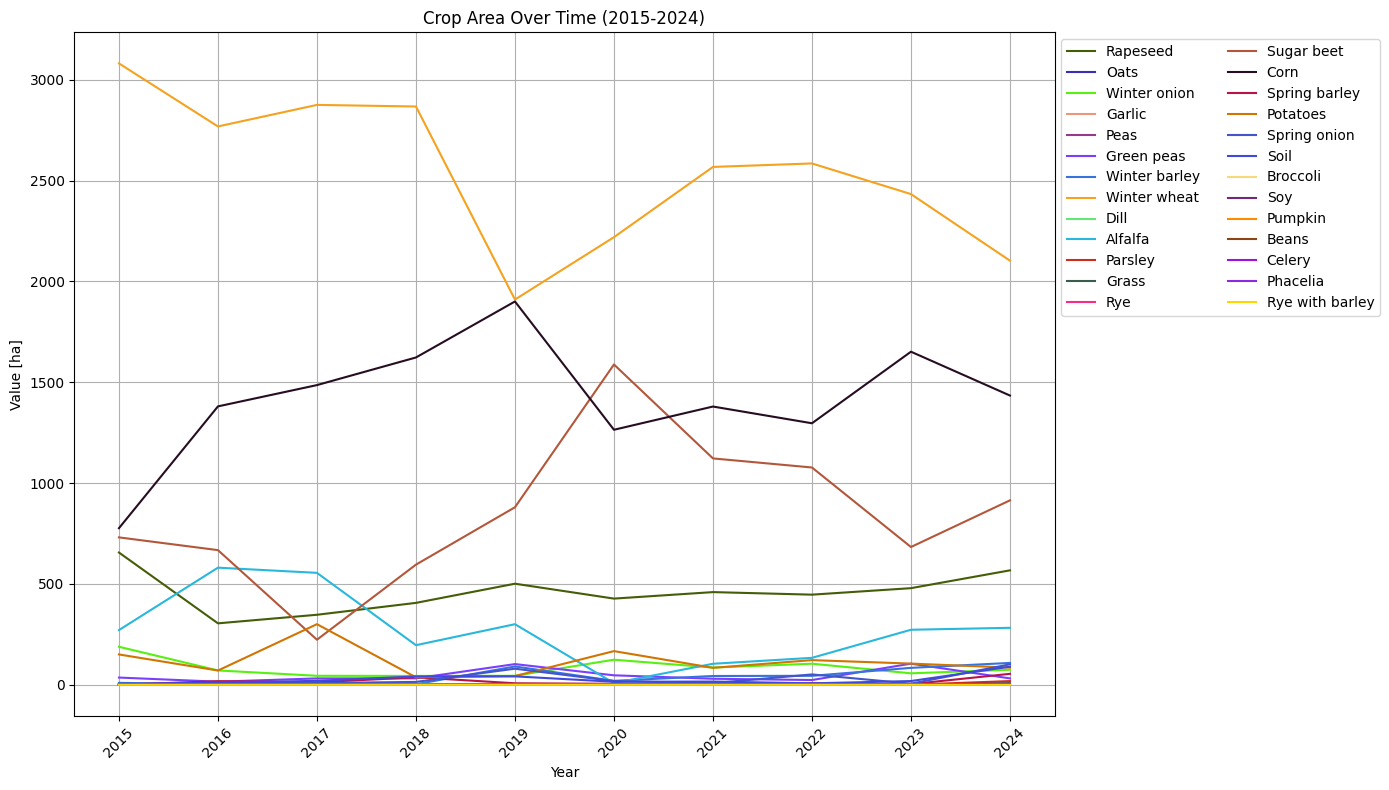

In [12]:
generate_plot(crop_plot)

In [10]:
Map, hist = accurency()
Map

Map(center=[52.68, 18.28], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [11]:
hist

In [13]:
classify_crop([52.68, 18.28], 'Sugar beet', 'b3573b')

Map(center=[52.68, 18.28], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [14]:
crop_index([52.68, 18.28], '445d07')

Map(center=[52.68, 18.28], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…